In [31]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# All results
# dictionaries by sodapy.
results = client.get("q2sg-894k", limit=117011)

# Convert to pandas DataFrame
results = pd.DataFrame.from_records(results)
results["diamesany"] = pd.to_datetime(results.data)

# We duplicate de dataframe and add a new column
results1 = pd.DataFrame.from_records(results)
results1['diames'] = pd.to_datetime(results.data).dt.strftime('%m-%d')

In [17]:
# Creation of a df with the necessary data
resultFiltred = pd.DataFrame(dict(
    v_fisica = results['v_fisica'],
    v_psicologica = results['v_psicologica'],
    v_sexual = results['v_sexual'],
    motiutrucada = results['motiutrucada'],
    diamesany = results['diamesany'],
    Any = results['any']))

# Filter pre-lockdown and lockdown periods
noCovid = resultFiltred.loc[(resultFiltred['diamesany'] <= '2020-03-15')]
covid = resultFiltred.loc[(resultFiltred['diamesany'] >= '2020-03-15') & 
                          (resultFiltred['diamesany'] < '2020-06-21')]

# Creation of a duplicate df with the necessary data
aux = pd.DataFrame(dict(
    v_fisica = results1['v_fisica'],
    v_psicologica = results1['v_psicologica'],
    v_sexual = results1['v_sexual'],
    motiutrucada = results1['motiutrucada'],
    diames = results1['diames'],
    Any = results1['any']))

# df of two studied years
df_2016 = aux.loc[(aux['Any'] == '2016')]
df_2016 = df_2016[df_2016['motiutrucada'] == 'Violència masclista']

df_2020 = aux.loc[(aux['Any'] == '2020')]
df_2020 = df_2020[df_2020['motiutrucada'] == 'Violència masclista']

In [18]:
from statistics import mean
# In order to know the numberof calls per day and its rate
covidMean = mean(covid.drop(columns=['v_fisica', 'v_psicologica', 'v_sexual', 'motiutrucada', 'Any']).value_counts().sort_index())
noCovidMean = mean(noCovid.drop(columns=['v_fisica', 'v_psicologica', 'v_sexual', 'motiutrucada', 'Any']).value_counts().sort_index())
noCovidMean, covidMean/noCovidMean

(31.14785252755606, 1.790669522232322)

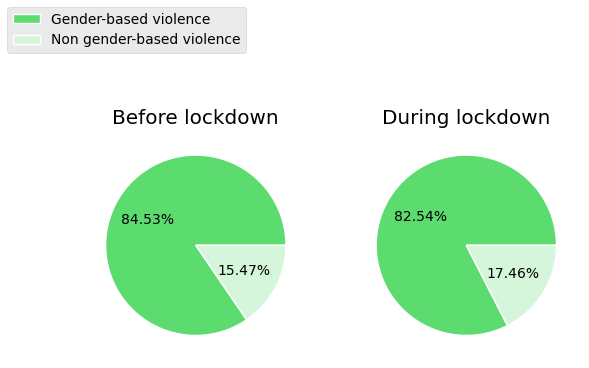

In [19]:
import matplotlib.pyplot as plt
# In order to know the differences between violence and concern
aux2 = pd.DataFrame(
    {'Before lockdown': [noCovid.value_counts('motiutrucada')[0], noCovid.value_counts('motiutrucada')[1]],
     'During lockdown': [covid.value_counts('motiutrucada')[0], covid.value_counts('motiutrucada')[1]]},
     index=['Gender-based violence', 'Non gender-based violence'])

plt.style.use('ggplot')
colors = ['#5cdb6f', '#d5f6da']

fig, axes = plt.subplots(nrows=1, ncols=2)
for ax, col in zip(axes.flat, aux2.columns):
    artists = ax.pie(aux2[col], autopct='%.2f%%', colors=colors, wedgeprops={"edgecolor": "white", 'linewidth': 1})
    ax.set(ylabel='', title=col, aspect='equal')

fig.legend(artists[0], aux2.index, loc='upper left')

plt.savefig('Pie.png')
plt.show()

In [20]:
# Filtering for violence and dropping extra columns
auxViolenceNoCovid = noCovid[noCovid['motiutrucada'] == 'Violència masclista']
auxViolenceCovid = covid[covid['motiutrucada'] == 'Violència masclista']

auxViolenceCovid2 = auxViolenceCovid.drop(['diamesany', 'motiutrucada', 'Any'], axis=1)
auxViolenceNoCovid2 = auxViolenceNoCovid.drop(['diamesany', 'motiutrucada', 'Any'], axis=1)


auxViolenceNoCovid2.value_counts().sort_index(), auxViolenceCovid2.value_counts().sort_index()

(v_fisica  v_psicologica  v_sexual
 No        No             No            244
                          Sí            385
           Sí             No          42268
                          Sí           1016
 Sí        No             No           1464
                          Sí             52
           Sí             No          23261
                          Sí            582
 dtype: int64,
 v_fisica  v_psicologica  v_sexual
 No        No             No             9
                          Sí            29
           Sí             No          2563
                          Sí            64
 Sí        No             No            49
                          Sí             4
           Sí             No          1642
                          Sí            40
 dtype: int64)

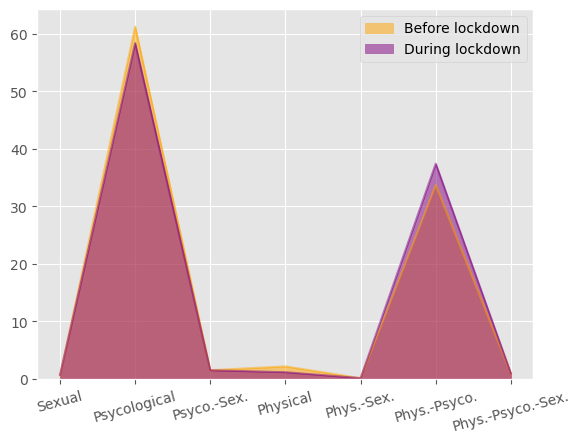

In [21]:
import numpy as np
import chartify
# Plotting the kind of violence distribution
sex = 29
psyco = 2563
psyco_sex = 64
phys = 49
phys_sex = 4
phys_psyco = 1642
phys_psyco_sex = 40

sex2 = 385
psyco2 = 42268
psyco_sex2 = 1016
phys2 = 1464
phys_sex2 = 52
phys_psyco2 = 23261
phys_psyco_sex2 = 582

suma = (sex + psyco + psyco_sex + phys + phys_sex + phys_psyco + phys_psyco_sex)/100

suma2 = (sex2 + psyco2 + psyco_sex2 + phys2 + phys_sex2 + phys_psyco2 + phys_psyco_sex2)/100

df_motiu_covid = pd.DataFrame(
    {'Before lockdown': [sex2/suma2, psyco2/suma2, psyco_sex2/suma2, phys2/suma2,
                        phys_sex2/suma2, phys_psyco2/suma2, phys_psyco_sex2/suma2],
     'During lockdown': [sex/suma, psyco/suma, psyco_sex/suma, phys/suma,
                         phys_sex/suma, phys_psyco/suma, phys_psyco_sex/suma]},
     index=['Sexual', 'Psycological', 'Psyco.-Sex.', 'Physical', 'Phys.-Sex.', 'Phys.-Psyco.', 'Phys.-Psyco.-Sex.'])

ax = df_motiu_covid.plot.area(stacked=False, rot=15, grid=True, color=('orange', 'purple'))
plt.savefig('area.png')

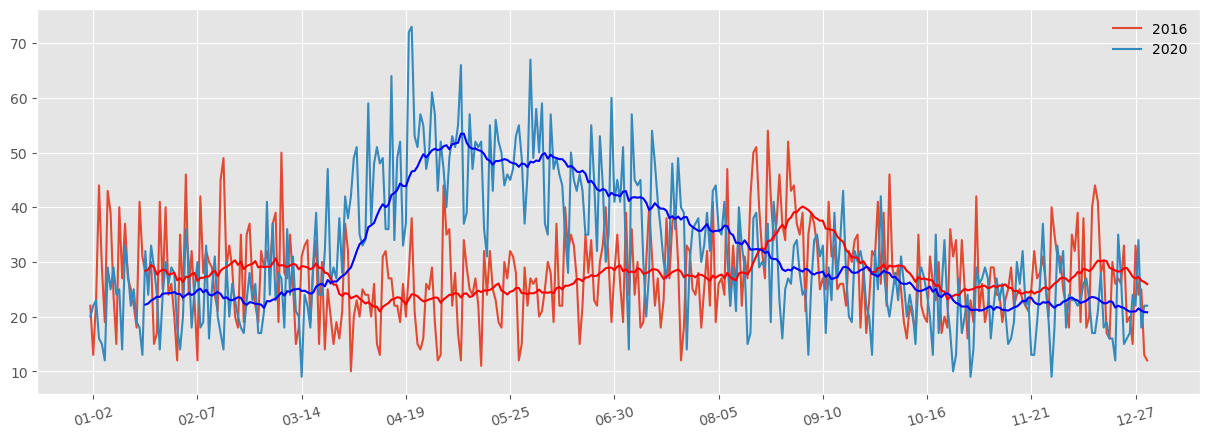

In [30]:
import matplotlib.pyplot as plt
# Showing the number of calls per day for two different years
beforeLockdown = df_2016.value_counts('diames').sort_index()
lockdown = df_2020.value_counts('diames').sort_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
# Dibujar puntos
ax.plot(beforeLockdown.index, beforeLockdown)
ax.plot(lockdown.index, lockdown)
ax.plot(beforeLockdown.index, beforeLockdown.rolling(20).mean(), 'r')
ax.plot(lockdown.index, lockdown.rolling(20).mean(), 'b')
ax.legend(['2016', '2020'], frameon=False, loc=1)

plt.xticks(range (1, 366, 36), rotation=15)


# Mostrar el gráfico
plt.savefig('comparation.png')
plt.show()